[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

[numpy.polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)

[numpy.poly1d](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html)

[numpy.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

In [228]:
# Import the libraries (numpy, pandas, pyplot)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data from Position_Salaries.csv file into a DataFrame
df = pd.read_csv("Position_Salaries.csv")


In [229]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [230]:
# Define the feature and target values

X =  df["Level"].values.reshape(-1, 1)
y = df["Salary"]

In [231]:
# Build a Linear Regression model on the whole dataset
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X, y)

LinearRegression()

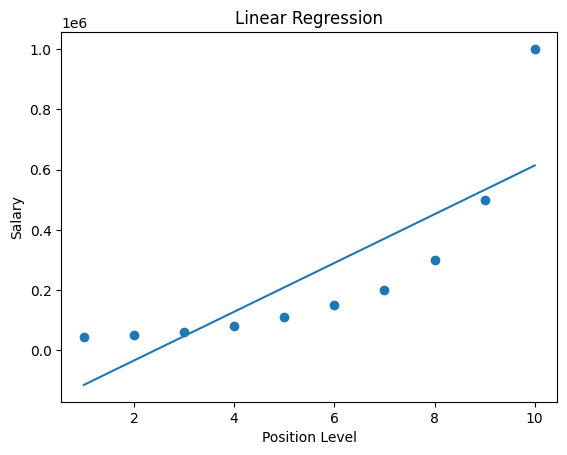

In [232]:
# Visualise the Linear Regression results on the whole dataset

# draw scatter plots of the whole dataset
#   x-axis: Position Level
#   y-axis: Salary
plt.scatter(X, y)

# Draw Polynomial Regression line
#   x: X
#   y: predicted results of linear_reg on X
plt.plot(X, linear_reg.predict(X))

plt.title('Linear Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Building Polynomial Regression model with Sklearn

In [233]:
# Build a Polynomial Regression model on the whole dataset

# import PolynomialFeatures from sklearn
from sklearn.preprocessing import PolynomialFeatures

# create an instance of PolynomialFeatures with degree=4
poly = PolynomialFeatures(degree=4)

# transform the features using fit_transform method of poly
X_poly = poly.fit_transform(X)

# build the polynomial regression model on the transformed fetures (X_poly)
poly_linear_reg = LinearRegression()

# fit
poly_linear_reg.fit(X_poly, y)

LinearRegression()

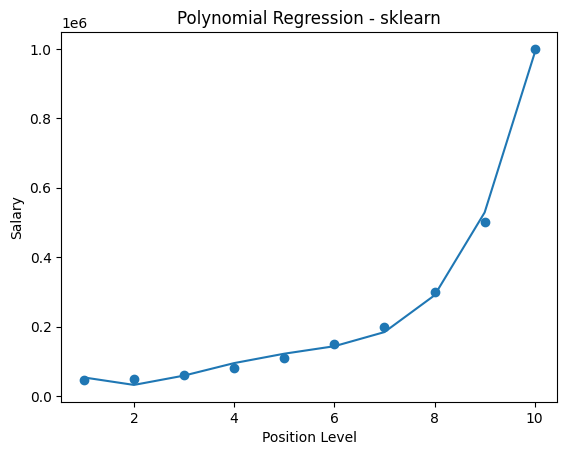

In [234]:
# Visualise the Polynomial Regression results on the whole dataset

# draw scatter plots of the whole dataset
#   x-axis: Position Level
#   y-axis: Salary
plt.scatter(X, y)

# Draw Polynomial Regression line
#   x: X
#   y: predicted results of poly_linear_reg on X_poly
plt.plot(X, poly_linear_reg.predict(X_poly))

plt.title('Polynomial Regression - sklearn')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Building Polynomial Regression model with Numpy

In [235]:
# fit a polynomial of degree 4 to points (x, y) using np.polyfit
# param: 1d array X, y, degree

coeff = np.polyfit(X.flatten(), y, 4)

# build the polynomial regression model with coeff using np.poly1d 
# param: coeff
np_poly_reg = np.poly1d(coeff)

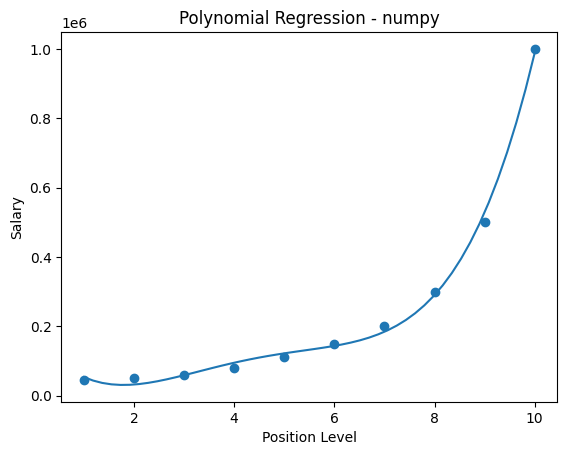

In [236]:
# Visualise the Polynomial Regression results using Numpy Polynomial

# create an evenly spaced range of numbers (1-10) using np.linspace
xp = np.linspace(1, 10)

# draw scatter plots of the whole dataset
#   x-axis: Position Level
#   y-axis: Salary
plt.scatter(X, y)


# Draw Polynomial Regression line
#   x: xp
#   y: np_poly_reg(xp)
plt.plot(xp, np_poly_reg(xp))

plt.title('Polynomial Regression - numpy')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [237]:
# Predict Salary from 5.5 Years Experience with Linear Regression
# param: 2d array
linear_reg.predict([[5.5]])

array([249500.])

In [238]:
# Predict Salary from 5.5 Years Experience with Sklearn Polynomial Regression
# param: transformed 2d array
poly_linear_reg.predict(poly.fit_transform([[5.5]]))

array([132148.43750002])

In [239]:
# Predict Salary from 5.5 Years Experience with Numpy Polynomial Regression
np_poly_reg(5.5)

132148.43750000064